# Анализ пассажирских авиаперевозок

Шаги с первого по третий включительно выполнялись в онлайн-тренажере. По итогу имеем три таблицы с данными (подробнее о каждой из них ниже), которыми и будем пользоваться для расчета необходимых показателей в Python.

## Шаг 4. Аналитика средствами Python

Имеются файлы, в которых содержатся результаты запросов из предыдущих заданий.
/datasets/query_1.csv — результат первого запроса. В нём содержится следующая информация:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится следующая информация:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

Также имеется /datasets/query_last.csv — результат последнего запроса. В нём следующая информация:

- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

Необходимо проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Начнем с импорта необходимых библиотек.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Импортируем данные:

In [2]:
df_planes = pd.read_csv('query_1.csv')
df_planes

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице, которая является результатом первого запроса, всего 8 строк и 2 столбца, поэтому корректность импорта и целостность данных можно оценить чисто визуально, не прибегая ни к каким дополнительным средствам. Видим, что данные импортированы корректно. Пропусков и аномальных значений не наблюдается.

In [3]:
df_cities = pd.read_csv('query_3.csv')
df_cities

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Вторая таблица куда более объемная. В ней названия для 101 города, а также среднее количество прибывающих ежедневно рейсов за сентябрь 2018 года. Изучим содержимое обеих таблиц более подробно.

In [4]:
df_planes.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Минимальное количество рейсов в месяц произведено на самолете Boeing 777-300 и равно 300 полетам. Максимальное — на самолете Cessna 208 Caravan и равно 4557. Среднее и медианное значения равны соответственно 2036 и 795. Такая разница между средним и медианой говорит о том, что в выборке присутствует относительно большое число наблюдений с низкими значениями. Действительно, из 8 моделей самолетов 5 совершили менее 1000 рейсов в месяц, в то время как 3 оставшиеся — больше 4000. Удостоверимся в том, что типы данных в таблице указаны корректно.

In [5]:
df_planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Столбцу с названиями моделей самолетов соответствует текстовый тип данных, столбцу с количеством полетов — целочисленный. Все правильно. Более подробно изучим таблицу с данными о количестве прибывших в различные города рейсов.

In [6]:
df_cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [7]:
df_cities.loc[df_cities['average_flights'].idxmin()]

city               Анадырь
average_flights          1
Name: 1, dtype: object

In [8]:
df_cities.loc[df_cities['average_flights'].idxmax()]

city                Москва
average_flights    129.774
Name: 43, dtype: object

Минимальное значение равно всего 1 полету в день, ему соответствует город Анадырь (возможно, это не единственный город с таким значением). Максимальное — почти 130. Очевидно, что это Москва и только Москва.

In [9]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропусков нет, тип данных для обоих столбцов (object для названия городов, float для среднего количества полетов) выбран корректно. Получим таблицу, содержащую топ-10 городов по количеству ежедневно прибывающих рейсов.

In [10]:
df_city_filter = df_cities.sort_values(by = 'average_flights', ascending = False).head(10)
df_city_filter

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Для удобства и наглядности построения графика упорядочим таблицу по количеству рейсов по убыванию.

In [11]:
df_plane_sorted = df_planes.sort_values(by = 'flights_amount', ascending = False)
df_plane_sorted

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Построим столбчатые диаграммы для всех трех таблиц. Начнем с первой.

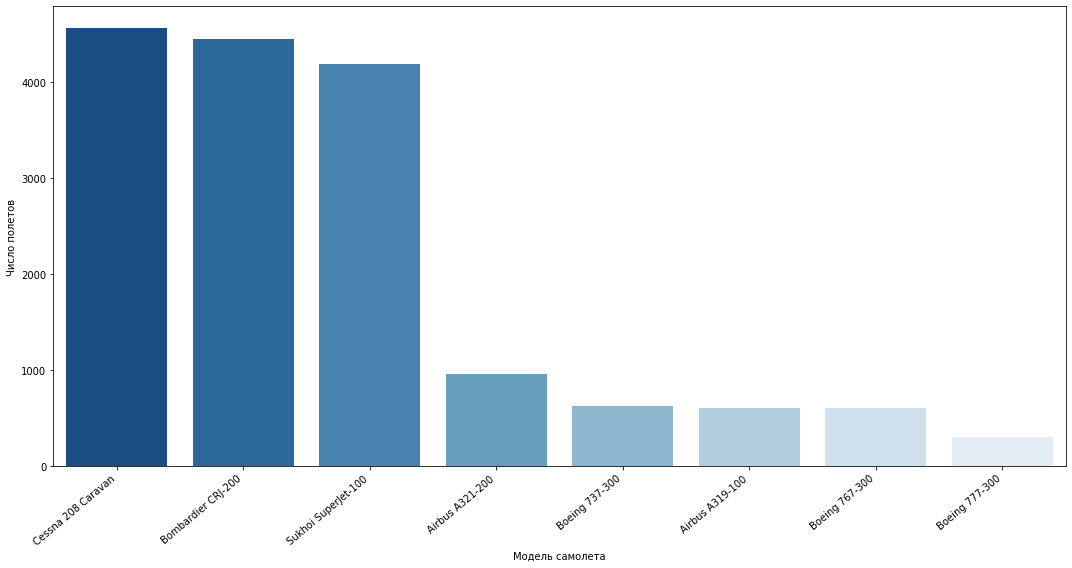

In [12]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = df_plane_sorted['model'], y = df_plane_sorted['flights_amount'], palette = 'Blues_r')
ax.set(xlabel = 'Модель самолета', ylabel = 'Число полетов')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [13]:
plane_percent = df_plane_sorted['flights_amount'].head(3).sum() / df_plane_sorted['flights_amount'].sum()
print('Доля топ-3 моделей в общем объеме перелетов: {:.0%}'.format(plane_percent))

Доля топ-3 моделей в общем объеме перелетов: 81%


На графике хорошо заметно, насколько отличаются значения для трех самых популярных и всех остальных моделей самолетов. Как уже отмечалось выше, каждая модель, попавшая в топ-3 совершила более 4000 рейсов за сентябрь 2018, в то время как 5 оставшихся — менее 1000. Более того, на топ-3 моделей приходится более 80% всех рейсов.

Дополним имеющиеся данные данными из открытых источников. Выясним, связано ли такое такое распределение авиа-трафика с ценой и пассажировместимостью отдельных моделей.

In [14]:
d = {'model':df_plane_sorted['model'],
     'flights':df_plane_sorted['flights_amount'],
     'cost':[2.32, 31.6, 50.1, 114.9, 106.1, 89.6, 199.3, 320],
     'seats':[14, 50, 87, 177, 130, 133, 375, 264]}
df_factors = pd.DataFrame(data=d)
df_factors

,model,flights,cost,seats
6,Cessna 208 Caravan,4557,2.32,14
5,Bombardier CRJ-200,4446,31.60,50
7,Sukhoi SuperJet-100,4185,50.10,87
1,Airbus A321-200,960,114.90,177
2,Boeing 737-300,630,106.10,130
0,Airbus A319-100,607,89.60,133
3,Boeing 767-300,600,199.30,375
4,Boeing 777-300,300,320.00,264


Построим матрицу корреляций для вновь полученной таблицу. Таким образом выясним, есть ли зависимость между количеством полетов и ценой самолета, а также между количеством полетов и количеством посадочных мест.

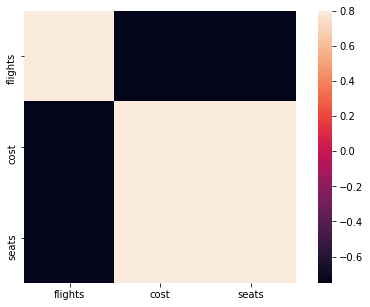

In [15]:
corrmat = df_factors.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True)

In [16]:
corrmat

,flights,cost,seats
flights,1.000000,-0.745601,-0.749944
cost,-0.745601,1.000000,0.834652
seats,-0.749944,0.834652,1.000000


Очевидно, что большие самолеты всегда дороже, а количество посадочных мест — хорошая proxy-метрика для стоимости авиасудна. Связь между количеством совершенных рейсов и ценой самолета, а также между количеством совершенных рейсов и количеством посадочных мест носит обратный характер — чем дешевле самолет и чем меньше на нем посадочных мест, тем чаще он использовался. Это, скорее всего, связано с финансовыми ограничениями, наличествующими в российской авиации, а также тем, что авиационные пассажиропотоки по большинству направлений до сих пор остаются сравнительно небольшими. Отсюда и популярность самолетов с ограниченной вместимостью. Коэффициенты корреляции между количеством совершенных рейсов и ценой самолета и между количеством совершенных рейсов и количеством посадочных мест неслучайно так близки к друг другу. Это связано с тем, что и сами параметры тесно связаны между собой.

Взглянем на распределение рейсов по городам. Создадим новую таблицу df_city_order, которая будет являться упорядоченной по убыванию (по столбцу average_flights) копией таблицы df_cities.

In [17]:
df_city_order = df_cities.sort_values(by = 'average_flights', ascending = False)

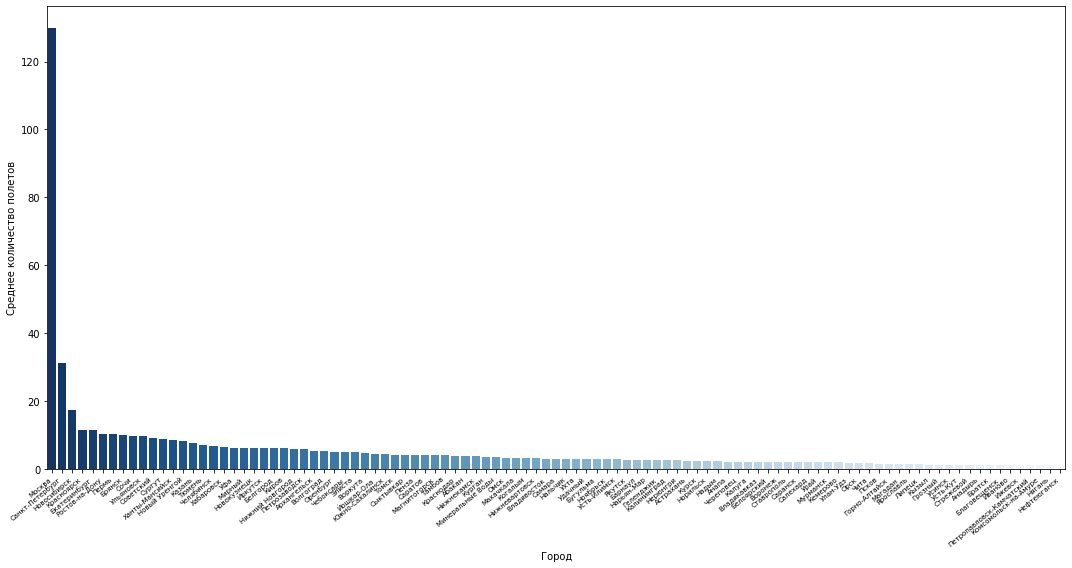

In [18]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = df_city_order['city'], y = df_city_order['average_flights'], palette = 'Blues_r')
ax.set(xlabel = 'Город', ylabel = 'Среднее количество полетов')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [19]:
plane_percent_1 = df_city_order['average_flights'].head(1).sum() / df_city_order['average_flights'].sum()
plane_percent_3 = df_city_order['average_flights'].head(3).sum() / df_city_order['average_flights'].sum()
print('Доля Москвы в общем объеме перелетов: {:.0%}'.format(plane_percent_1))
print('Доля топ-3 городов в общем объеме перелетов: {:.0%}'.format(plane_percent_3))

Доля Москвы в общем объеме перелетов: 23%
Доля топ-3 городов в общем объеме перелетов: 32%


In [20]:
df_city_order.tail(10)

,city,average_flights
76,Стрежевой,1.0
1,Анадырь,1.0
9,Братск,1.0
8,Благовещенск,1.0
21,Иваново,1.0
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0
49,Нефтеюганск,1.0


На графике хорошо заметна разница между 1) Москвой и остальной Россией, 2) топ-3 городами (Москва, Санкт-Петербург и Новосибирск) и остальной Россией. Так, на долю Москвы пришлось 23% всех ежедневных перелетов, а на долю топ-3 городов — 32%. Чем дальше к концу списка, тем менее выраженной становится разница. 10 городов с минимальным количеством средних ежедневных перелетов все имеют это значение равное 1.

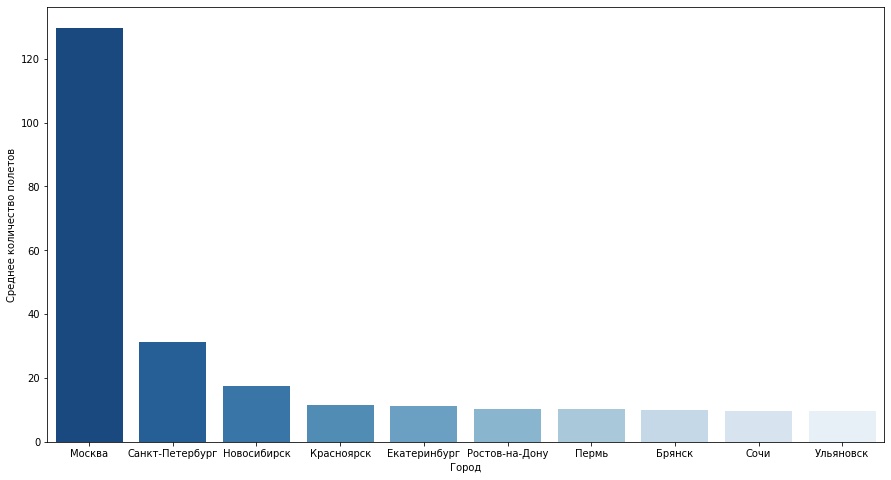

In [21]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = df_city_filter['city'], y = df_city_filter['average_flights'], palette = 'Blues_r')
ax.set(xlabel = 'Город', ylabel = 'Среднее количество полетов')
plt.show()

In [22]:
plane_percent_10 = df_city_order['average_flights'].head(1).sum() / df_city_order['average_flights'].head(10).sum()
print('Доля Москвы в общем объеме перелетов: {:.0%}'.format(plane_percent_10))

Доля Москвы в общем объеме перелетов: 52%


По этому графику можно сделать те же выводу, что и по предыдущему: Москва лидирует с большим отрывом. Петербург и Новосибирск, хоть и занимают вторую и третью строчку соответственно, по количеству прибывающих рейсов все равно куда ближе к провинциальным городам, чем к столице. В топ-10 на долю Москвы приходится более половины всех прибывающих рейсов.

### Вывод по шагу 4

На данном этапе мы импортировали три таблицы, полученные ранее с помощью SQL-запросов через тренажер. Тип данных в них указан корректно. Пропуски, имеющиеся только в одной таблице, были оставлены без изменений по причине их содержательности: пропусками отмечались недели, в которые не проводилось ни одного фестиваля.

Визуально и арифметически оценили доли всех рейсов, которые приходятся на 1) Москву, 2) топ-3 (по количеству рейсов) городов России. На долю Москвы пришлось 23% всех ежедневных перелетов, на долю топ-3 городов — 32%, что говорит о ярко выраженной склонности к централизации в индустрии авиаперевозок в России.

Выяснили, какие модели самолетов являются в России наиболее и наименее популярными, а также — с помощью данных из открытых источников — установили наличие ярко выраженной связи между количеством выполненных рейсов и стоимостью / количеством посадочных мест для каждой конкретной модели. 

## Шаг 5. Проверка гипотезы средствами Python

In [23]:
df_fest = pd.read_csv('query_last.csv')
df_fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


В таблице всего 10 значений. Имеющиеся пропуски допущены сознательно на этапе выгрузки данных из базы. Пропущенные значения в столбцах festival_week и festival_name говорят о том, что в эту неделю фестиваль не проводился.

Создадим дополнительной столбец fest, который будет отвечать за наличие / отсутствие фестиваля на каждой из рассматриваемых в таблице недель. Те недели, когда фестиваль проходил, отметим значением 1. Те, когда нет, — значением 0.

In [24]:
df_fest['fest'] = df_fest['festival_week']
df_fest['fest'] = df_fest['fest'].fillna('0').astype('int')
df_fest['fest'] = (df_fest['fest'] > 1).astype('int')
df_fest

,week_number,ticket_amount,festival_week,festival_name,fest
0,30,43568,30.0,Park Live,1
1,31,51034,31.0,Пикник Афиши,1
2,32,51675,NaN,NaN,0
3,33,51378,NaN,NaN,0
4,34,51492,NaN,NaN,0
5,35,51360,NaN,NaN,0
6,36,51386,36.0,Видфест,1
7,37,51670,NaN,NaN,0
8,38,51518,NaN,NaN,0
9,39,51623,NaN,NaN,0


Сформулируем основную и альтернативную гипотезы. Проверим их с помощью метода ttest_ind из модуля stats библиотеки scipy. Пороговое значение задаем на уровне 0,05.

- H0: средний спрос на билеты во время фестивалей *не* отличается от среднего спроса на билеты в обычное время.
- H1: средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.

In [25]:
a = df_fest.loc[df_fest['fest'] == 1, 'ticket_amount']
b = df_fest.loc[df_fest['fest'] == 0, 'ticket_amount']
result = st.ttest_ind(a, b)

In [26]:
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу.')
    print('P-value равно {:.4f}.'.format(result.pvalue))
else:
    print('Не удалось отвергнуть нулевую гипотезу.')
    print('P-value равно {:.4f}.'.format(result.pvalue))

Не удалось отвергнуть нулевую гипотезу.
P-value равно 0.0969.


По результатам проведенного теста у нас нет достаточных оснований для того, что отвергнуть нулевую гипотезу. Можно сделать вывод о том, что наличие фестивалей никак не влияет на спрос на авиабилеты.

### Вывод по шагу 5

На данном этапе мы проверили гипотезу о влиянии проведения фестивалей на спрос на авиабилеты. По результатам проверки можно утверждать, что проведение фестивалей никак не сказывается на спросе.

## Общий вывод

В рамках исследования мы воспользовались данными, полученными ранее с помощью SQL-запросов, проверили их на наличие пропусков и адекватность выбранных типов данных.

Выяснили, что на долю Москвы пришлось 23% всех рейсов, на долю Москвы, Санкт-Петербурга и Новосибирска — 32%. Наиболее популярными моделями самолетов, во всяком случае в рамках выбранной авиакомпании, являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. С помощью дополнительных данных из открытых источников удалось установить, что это связано с их низкой стоимостью и относительно небольшим количеством посадочных мест.

На завершающем этапе исследования проверили следующую гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». Выяснили, что проведение фестивалей никак не влияет на спрос на авиабилеты.